In [1]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests
import io

In [2]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [1]:
rows = int(10)
s = '*'
b = ' '
for i in range(1, rows+1):
    print((b * (rows-i)),(s * (2*i-1)))
for i in range(rows):
    print((b * (i+1)),(s * (2*(rows-1-i)-1)))

          *
         ***
        *****
       *******
      *********
     ***********
    *************
   ***************
  *****************
 *******************
  *****************
   ***************
    *************
     ***********
      *********
       *******
        *****
         ***
          *
           


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [4]:
aa = pd.read_csv('symbols01.txt', header = None)   #直接用pandas讀
aa.columns = ['company']
aa.head()

,company
0,FCCY
1,ACRX
2,ADMP
3,IOTS
4,ADMA


In [5]:
bb = pd.read_csv('symbols02.txt', header = None)
bb.columns = ['company']
bb.head()

,company
0,PIH
1,VNET
2,ACMR
3,ADAP
4,IOTS


In [6]:
cc = pd.merge(aa, bb, how='outer')
dd = cc['company'].tolist()

In [7]:
with open('symbols03.txt', 'w') as f:
    for symbol in dd:
        f.write(symbol.strip().upper() + "\n")

# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [8]:
url = "http://dts.twse.com.tw/opendata/t187ap03_L.csv"
r = requests.get(url)
r.encoding = 'big5'

In [9]:
r2 = str(r.text)
print(r2)

106年12月07日17:30:01公司基本資料,
"公司代號","公司名稱","產業別","住址","營利事業統一編號","董事長","總經理","發言人","發言人職稱","代理發言人",總機電話","成立日期","上市日期","普通股每股面額","實收資本額","私募股數","特別股","編制財務報表類型","股票過戶機構","過戶電話","過戶地址","英文簡稱","英文通訊地址","傳真機號碼","電子郵件信箱","網址" 
"1101","台灣水泥股份有限公司","水泥工業","台北市中山北路2段113號","11913502","張安平","李鐘培","黃健強","資深副總經理","蔡立文","(02)2531-7099","19501229","19620209","新台幣                 10.0000元","42465090100","0","0","1","中國信託商業銀行代理部","66365566","台北市重慶南路一段83號5樓","TCC","No.113, Sec.2, Zhongshan N. Rd.,Taipei City 104,Taiwan (R.O.C.)","(02)2531-6529","finance@taiwancement.com","http://www.taiwancement.com",
"1102","亞洲水泥股份有限公司","水泥工業","台北市大安區敦化南路2段207號30、31樓","03244509","徐旭東","李坤炎","周維崑","副總經理","吳玲綾","02-2733-8000","19570321","19620608","新台幣                 10.0000元","33614471980","0","0","1","亞東證券股份有限公司","02-2361-8608","台北市重慶南路一段86號3樓","ACC","30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUTH ROAD,SEC.2,TAIPEI,TAIWAN,R.O.C","02-2378-5191","service@acc.com.tw","www.acc.com.tw",
"1103","嘉新水泥股份有限公司","水泥工業","台北市中山北路2

In [12]:
taiwan = pd.read_csv(io.StringIO(r2),index_col  = False, header = 1)
taiwan.drop([923])
taiwan

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
0,1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,...,0.0,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com
1,1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,...,0.0,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw
2,1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,...,0.0,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw
3,1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,...,0.0,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com
4,1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,...,0.0,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw
5,1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,...,0.0,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw
6,1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,...,0.0,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw
7,1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,...,0.0,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw
8,1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,...,0.0,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com
9,1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,...,0.0,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com


In [13]:
time = r2[:24]
total = r2[-8:]
print(time,total)

106年12月07日17:30:01公司基本資料 合計:共923筆


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [3]:
tw2317 = web.DataReader("2317.tw", 'yahoo', datetime(2016,2,1))
tw2317 = tw2317.dropna()  # 有遺失值的觀測值都刪除
tw2317.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-01,71.909103,72.272697,71.090897,72.272697,66.638725,32793200.0
2016-02-02,72.545403,72.636398,71.272697,71.272697,65.716682,22218900.0
2016-02-03,70.909103,71.000000,69.363602,69.636398,64.207939,40674700.0
2016-02-15,69.636398,69.636398,67.090897,67.909103,62.615299,68901800.0
2016-02-16,68.000000,70.000000,68.000000,69.636398,64.207939,34986600.0


In [4]:
import talib
from talib import MA_Type
macd, macdsignal, macdhist = talib.MACD(tw2317['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

In [5]:
tw2317['DIF'] = macd
tw2317['MACD'] = macdsignal
tw2317['OSC'] = macdhist
tw2317.tail()

,Open,High,Low,Close,Adj Close,Volume,DIF,MACD,OSC
Date,,,,,,,,,
2017-12-06,93.500000,94.500000,93.000000,93.000000,93.000000,98881764.0,-3.315641,-2.361544,-0.954097
2017-12-07,93.599998,94.300003,93.000000,93.599998,93.599998,40280653.0,-3.593736,-2.607982,-0.985753
2017-12-08,93.199997,94.300003,92.500000,93.599998,93.599998,44832781.0,-3.770661,-2.840518,-0.930143
2017-12-11,95.699997,97.300003,95.599998,96.000000,96.000000,72634921.0,-3.674855,-3.007385,-0.667470
2017-12-12,96.000000,96.000000,94.000000,94.099998,94.099998,50297573.0,-3.709481,-3.147805,-0.561677


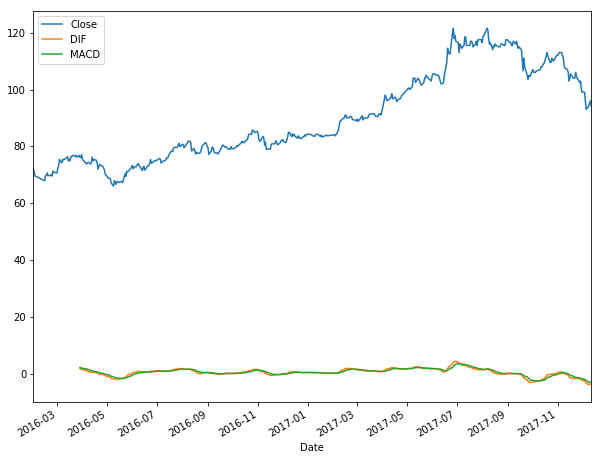

In [6]:
tw2317[['Close', 'DIF','MACD']].plot(legend='best', figsize=(10,8))

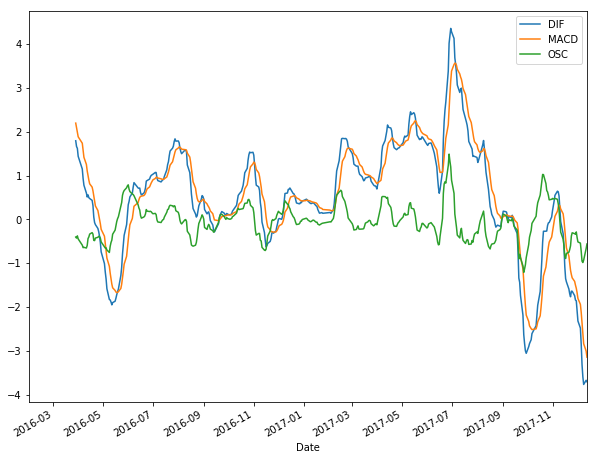

In [7]:
tw2317[['DIF','MACD','OSC']].plot(legend='best', figsize=(10,8))

# Q5. 策略回測

In [3]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [4]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [5]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [6]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [7]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [8]:
# 定義你的策略

def M064030003_strategy(df):
    has_position = False
    df['signals'] = 0
    
    df['MA5'] = talib.MA(df['Close'].values,5,matype=0)
    df['MA15'] = talib.MA(df['Close'].values,15,matype=0)
    df['Vol5'] = np.round(pd.Series.rolling(df['Volume'], window=5).mean(), 2)
    df['DIF'], df['MACD'], df['OSC'] = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
    #
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['MA5'][t-1] and df['MA5'][t-1] > df['MA15'][t-1] and df['MA5'][t-2] < df['MA15'][t-2] and df['DIF'][t-1] > df['MACD'][t-1] and df['Volume'][t] > df['Vol5'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['MA5'][t-1] and df['Volume'][t] > df['Vol5'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False
    

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [9]:
def apply_strategy(strategy, df):
    return strategy(df)

In [10]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, M064030003_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [11]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [12]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,-1.315907,-0.073846,567,0.953462,705,4,TICC,M064030003_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [13]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
73,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
74,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
75,-3.687017,-0.019013,50,0.986030,473,2,LCA,M064030003_strategy
67,-10.346846,-0.022226,64,0.963097,384,3,SCAC,M064030003_strategy


In [14]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
78,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
5,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
90,1.724711,-0.231083,481,1.717758,704,20,ISRL,BBands_strategy


In [16]:
myresult = results_df[results_df['strategy'].isin(['M064030003_strategy'])]

In [17]:
myresult

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
3,-1.315907,-0.073846,567,0.953462,705,4,TICC,M064030003_strategy
7,1.685812,-0.047863,202,1.101875,705,5,TWIN,M064030003_strategy
11,1.905719,-0.181945,605,1.163852,705,5,AMOT,M064030003_strategy
15,-8.094832,-0.212918,231,0.796181,705,2,CDZI,M064030003_strategy
19,5.003488,-0.024952,129,1.097430,705,3,GOOG,M064030003_strategy
23,-0.087759,-0.031138,371,0.996026,705,3,TBNK,M064030003_strategy
27,1.282323,-0.160553,381,1.084475,705,4,RICK,M064030003_strategy
31,-3.211019,-0.111700,393,0.895280,705,6,UTMD,M064030003_strategy
35,2.377085,-0.102216,16,1.106454,350,1,YTRA,M064030003_strategy
39,4.871027,-0.026308,7,1.102508,203,1,CSML,M064030003_strategy


In [18]:
myresult.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
87,2.446594,-0.157729,492,1.182413,705,6,TSLA,M064030003_strategy
11,1.905719,-0.181945,605,1.163852,705,5,AMOT,M064030003_strategy
59,1.652542,-0.157412,307,1.162727,705,6,CDXS,M064030003_strategy
47,1.058347,-0.235303,259,1.155592,705,7,BLCM,M064030003_strategy
107,2.078862,-0.098001,362,1.128239,705,4,VRA,M064030003_strategy


In [19]:
myresult.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
75,-3.687017,-0.019013,50,0.986030,473,2,LCA,M064030003_strategy
67,-10.346846,-0.022226,64,0.963097,384,3,SCAC,M064030003_strategy
99,2.034018,-0.023843,27,1.022645,438,2,PSC,M064030003_strategy
19,5.003488,-0.024952,129,1.097430,705,3,GOOG,M064030003_strategy
39,4.871027,-0.026308,7,1.102508,203,1,CSML,M064030003_strategy
